<a href="https://colab.research.google.com/github/sanenchan/nyoba/blob/master/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [87]:
consumer_key = "77FBm5yhuqaut06hqozP8O8EV"
consumer_secret_key ="g1KgZvx5uNWsxJE3wLVvwMYXlEHIYcPOmrBIwaIbbGmalr327T"
access_token = "1295686074971254784-MXtqxjOUQTiuqbApfUVFNcoe9xCPVb"
access_token_secret = "1I64e9Ch3n0vJSK8dEyVMMrFeskUovU7NXqxhQTOBml2i"

auth = tw.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)



In [118]:
new_search = "Vaksin+covid-19"

tweets = tw.Cursor(api.search,
                   q=new_search,
                   lang="id",
                   since='2018-04-23').items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]


['Harus Jadi Role Model, IDI Medan Siap Jadi Pihak yang Pertama Kali Disuntik Vaksin Covid-19\n \nDownload aplikasi Tri… https://t.co/mHq4hHGYvx',
 'RT @KetumProDEM: Banyak vaksin Covid-19 dibuat di dunia: Pfizer, Moderna, Sinovac, Sinopharm, Astra Zaneca, etc. \nTapi, belum satupun vaksi…',
 'Bahwa vaksin covid 19 adalah kabar gembira https://t.co/qwuoh2AYfI',
 'Bamsoet Apresiasi Langkah Pemerintah Gratiskan Vaksin Covid-19 https://t.co/OD5eaF8UaV',
 'Relawan Vaksin Covid-19 Jalani Enam Kali Kunjungan https://t.co/GQkG1uDxAW https://t.co/NkQVCDpHSE']

In [119]:
df = pd.DataFrame(data=all_tweets, 
                    columns=["Tweets"])
df

,Tweets
0,"Harus Jadi Role Model, IDI Medan Siap Jadi Pih..."
1,RT @KetumProDEM: Banyak vaksin Covid-19 dibuat...
2,Bahwa vaksin covid 19 adalah kabar gembira htt...
3,Bamsoet Apresiasi Langkah Pemerintah Gratiskan...
4,Relawan Vaksin Covid-19 Jalani Enam Kali Kunju...
...,...
995,RT @tvOneNews: Kemenkes Siapkan Rencana Kerja ...
996,RT @ferdiriva: Informasi vaksin untuk Indonesi...
997,Pemerintah akhirnya menggratiskan vaksinasi vi...
998,RT @trendingtopiq: Jadi setelah menerima banya...


In [120]:
def cleanText(teks):
    teks = re.sub('@[A-Za-z0-9]+', '',teks)  #hapus @
    teks = re.sub(r'#([^\s]+)', r'\1', teks) #hapus #tagger
    teks = re.sub('RT[\s]+', '',teks)#hapus RT
    teks = re.sub('https?:\/\/\S+', '',teks)#hapus hyperlink
    teks = teks.lower() #ubah jadi lower case
    return teks

#Apply function on review column
df["Tweets"] = df["Tweets"].apply(cleanText)

df

,Tweets
0,"harus jadi role model, idi medan siap jadi pih..."
1,: banyak vaksin covid-19 dibuat di dunia: pfiz...
2,bahwa vaksin covid 19 adalah kabar gembira
3,bamsoet apresiasi langkah pemerintah gratiskan...
4,relawan vaksin covid-19 jalani enam kali kunju...
...,...
995,: kemenkes siapkan rencana kerja soal pemberia...
996,": informasi vaksin untuk indonesia, thailand, ..."
997,pemerintah akhirnya menggratiskan vaksinasi vi...
998,: jadi setelah menerima banyak masukan dari ma...


In [121]:
def getSubjecttivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjecttivity']=df['Tweets'].apply(getSubjecttivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

df

,Tweets,Subjecttivity,Polarity
0,"harus jadi role model, idi medan siap jadi pih...",0.0,0.0
1,: banyak vaksin covid-19 dibuat di dunia: pfiz...,0.0,0.0
2,bahwa vaksin covid 19 adalah kabar gembira,0.0,0.0
3,bamsoet apresiasi langkah pemerintah gratiskan...,0.0,0.0
4,relawan vaksin covid-19 jalani enam kali kunju...,0.0,0.0
...,...,...,...
995,: kemenkes siapkan rencana kerja soal pemberia...,0.0,0.0
996,": informasi vaksin untuk indonesia, thailand, ...",0.0,0.0
997,pemerintah akhirnya menggratiskan vaksinasi vi...,0.0,0.0
998,: jadi setelah menerima banyak masukan dari ma...,0.0,0.0


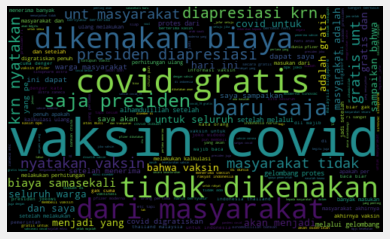

In [122]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [123]:
def getAnalysisSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
        
df['Analysis'] = df['Polarity'].apply(getAnalysisSentiment)

df

,Tweets,Subjecttivity,Polarity,Analysis
0,"harus jadi role model, idi medan siap jadi pih...",0.0,0.0,Neutral
1,: banyak vaksin covid-19 dibuat di dunia: pfiz...,0.0,0.0,Neutral
2,bahwa vaksin covid 19 adalah kabar gembira,0.0,0.0,Neutral
3,bamsoet apresiasi langkah pemerintah gratiskan...,0.0,0.0,Neutral
4,relawan vaksin covid-19 jalani enam kali kunju...,0.0,0.0,Neutral
...,...,...,...,...
995,: kemenkes siapkan rencana kerja soal pemberia...,0.0,0.0,Neutral
996,": informasi vaksin untuk indonesia, thailand, ...",0.0,0.0,Neutral
997,pemerintah akhirnya menggratiskan vaksinasi vi...,0.0,0.0,Neutral
998,: jadi setelah menerima banyak masukan dari ma...,0.0,0.0,Neutral


In [105]:
print('Printing neutral tweets: \n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #sorting tweets
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j)+ ') '+sortedDF["Tweets"][i])
        print()
        j = j+1

Printing neutral tweets: 

1) : kasihan rakyat indonesia, sampai harus berterima kasih &amp; apresiasi kepada presiden atas apa yang seharusnya menjadi hak…

2) : ... kalau test poligami yakinlah a'a gym maju paling di depan 😊😊😊

 

3) semua orang susah, bre. kemarin kita gaada tka karena emg kondisinya masih ga nentu. kalian nanti bakal lebih enak… 

4) : apakah vaksin bisa jadi jawaban buat indonesia agar tidak terperosok dalam jurang endemi? gimana mekanismenya?

 ngob…

5) setuju dg mba  
vaksin pertama diberikan pada ulama karena ulama sbg panutan umat 

6)      _l4ngit   gak perlu dijelas ka… 

7) _didu: barangkali pak menteri  bisa menjelaskan kenapa "ngotot" beli vaksin sinovac ?

8) : cambodia  melarang perempuan berpakaian minim dan skrg menolak vaksin china

fix cambodia gak toleran ga nusantara tolong d…

9) : ga kaget kalau tiba-tiba xiaomi ngeluarin vaksin.

10) : kamboja ingin hindari vaksin china sinovac

"kamboja bukan tempat sampah dan bukan tempat untuk uji coba vaks